# TP2 : Mesure du coefficient de rebond d’une balle
### Auteur : ARGUELLO Camilo

### Introduction

L'objectif de ce TP est d'étudier le coefficient de restitution d'une balle de ping-pong lors qu'elle chute et rebond contre le sol. En particulier, à partir des données des temps prises par notre téléphone et l'application [PhyPhox](https://phyphox.org). Où, on pourra mésurer les temps de rebond de la balle. Pour évaluer notre modèle, on introduira les notions des incertitudes des erreurs systématiques ainsi que des erreurs statistiques liées à la mesure.

L'analyse est faite avec [Python](https://python.org) en utilisant les modules [numpy](https://numpy.org/), [pandas](https://pandas.pydata.org/) et [matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import qexpy

### Mesure des rebonds de la balle et extraction d'une mesure du coefficient de restitution

Dans un prémièr temps on réalise les mesures où le protocole expérimental suivi consiste dans 3 parties: 

**1. Choix du lieu**

L'objectif est de réaliser l'expérience dans un endroit silencieux. On se place dans une pièce au sol en parquet. À l'aide d'un mètre on mesure l'hauteur initiale d'environ $h_0 = 1\text{ m} \pm 0.01\text{ m}$.

**2. Réglages PhyPhox**

Dans l'application `Phyphox`, on cherche la section `Acoustic Stopwatch`, dans l'onglet `Simple`, on règle le seuil de détection à $0.1\text{ m/s}$. Avec un délai de $0.1\text{ s}$. Même s'il endroit il est silencieux, le bruit produit par la balle de ping-pong n'est pas assez fort pour que l'application puisse le détecter.

**3. Mesure de temps**

Nous avons mesuré les temps de rebond de la balle de ping-pong qui tombe depuis une hauteur $h_0$. La balle de ping-pong a une masse de $0.1\text{ kg}$. Nous avons pris deux fois les mesures de temps de rebond. Les données sont dans le fichier `All.csv`. 

Nous pouvons estimer visuellement le comportement des rebonds de la balle de ping pong en fonction du temps, pour chaque rebond l'application mésure un évenement.

![Chute d'une balle de ping pong](./h_t.jpg "h_t")


In [27]:
# Constantes

g=9.81 # m/s2
m=0.10 # kg (masse d'une balle de ping-pong)
h_0=1.0 # m (hauteur initiale)

In [28]:
# On ajoute le fichier All.csv
data = pd.read_csv('./Acoustic Stopwatch_2024-03-07_15-24-18/All.csv', sep=',')
# On affiche les 5 premières lignes
data.head()

,Event time (s),Interval (s)
0,2.133771,0.785792
1,2.919563,0.668104
2,3.587667,0.578625
3,4.166292,0.509146
4,4.675438,0.454750


Les deux colonnes affichés contiennent l'information liée à:
- `Event time (s)` le temps en seconds de déclénchement à partir des conditions initales comme le bruit au moment de faire l'expériment. On rélatione un rebond comme un évènement.
- `Interval (s)` qui corresponde au temps en seconds de l'interval entre chaque rebond. 


Notre objectif en première terme c'est de calculer la différence de temps entre chaque rebond, cela va nous permettre de vérifier si l'information qu'on a mesuré est correcte, c'est-à-dire que le bruit n'a pas afecté la prise de mesures.

On va ajouter une nouvelle colonne appelée `diff` avec les informations de différence entre chaque évenement en seconds.

In [29]:
## Pour la première colonne, on calcule la différence de temps entre deux événements

# on calcule la différence de temps entre deux événements
data['diff'] = data['Event time (s)'].diff()
# on supprime la première ligne qui est NaN
data = data.dropna()
# on affiche les 5 premières lignes
data.head()

,Event time (s),Interval (s),diff
1,2.919563,0.668104,0.785792
2,3.587667,0.578625,0.668104
3,4.166292,0.509146,0.578625
4,4.675438,0.454750,0.509146
5,5.130187,0.411521,0.454750


In [30]:
# on verifie que la diff est égale à la colonne Interval (s) 
# Il faut comparer les lignes de cette façon:
# ligne 2: data['diff'] avec ligne 1: data['Interval (s)']
# ligne 3: data['diff'] avec ligne 2: data['Interval (s)']
# ligne 4: data['diff'] avec ligne 3: data['Interval (s)']
# etc.

def interval_diff_compare(data):
    for i in range(1, len(data)):
        if round(data['diff'][i+1], 2) != round(data['Interval (s)'][i], 2):
            return False
    return True

# on verifie que la diff est égale à la colonne Interval (s)
print("La difference de temps est égale à l'intervalle 'Event time (s)': ", interval_diff_compare(data))


La difference de temps est égale à l'intervalle 'Event time (s)':  True


On a bien la confirmation que les intervalles des événements calculés par `Phyphox` sont corrects.

Maintenant, on s'intéresse à calculer la vitesse entre chaque rebond selon la rélation:

$$ v_i = \frac{g \ T_i}{2} $$ 

Où, $g$ c'est la gravité et $T_i$ est l'intervalle de temps, dans notre cas la colonne `diff`.

Pour cela on ajoute une nouvelle colonne `vitesse` dans notre tableau. Et on fait une représentation graphique en fonction du rebound $i$. Vu la rélation directe ntre $T_i$ et $v_i$, comme $T_i$ diminue, alors on peut s'attendre à une diminution de la vitesse entre chaque rebond.

In [31]:
## Calcul de la vitesse entre chaque rebond grâce à la formule v_i = g * T_i / 2
data['vitesse'] = g * data['diff'] / 2
# on affiche les 5 premières lignes
data.head()

,Event time (s),Interval (s),diff,vitesse
1,2.919563,0.668104,0.785792,3.854308
2,3.587667,0.578625,0.668104,3.277051
3,4.166292,0.509146,0.578625,2.838156
4,4.675438,0.454750,0.509146,2.497360
5,5.130187,0.411521,0.454750,2.230549


In [32]:
# On calcule le nombre du rebond
data['rebond'] = np.arange(1, len(data)+1)

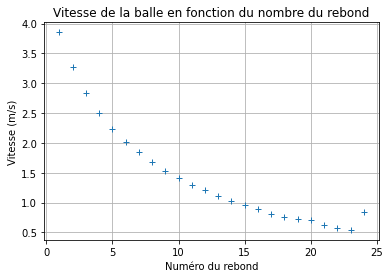

In [33]:
# On trace la vitesse de la balle en fonction du nombre du rebond
plt.plot(data['rebond'], data['vitesse'], '+')
plt.title('Vitesse de la balle en fonction du nombre du rebond')
plt.xlabel('Numéro du rebond')
plt.ylabel('Vitesse (m/s)')
plt.grid()
plt.show()

On a bien vérifié une diminution de la vitesse en fonction du nombre de rebonds. Pourtant, les temps de mesures vers la fin on augmenté, cela dû à du bruit enregistré lors des derniers rebonds. Alors on peut donc excluire les valeurs du bruit à partir de $i > 23$ selon le tableau des vitesses.

In [34]:
## i jusqu'à 23
data = data.iloc[:23]

data.tail()

,Event time (s),Interval (s),diff,vitesse,rebond
19,8.647312,0.144646,0.147646,0.724203,19
20,8.791958,0.127479,0.144646,0.709488,20
21,8.919438,0.117313,0.127479,0.625285,21
22,9.036750,0.110271,0.117312,0.575418,22
23,9.147021,0.171437,0.110271,0.540878,23


De même, si on analyse la rélation d'energie potentielle de la balle:

$$ E_p = m g h_i $$

Avec $m$ la masse, $h$ la hauteur de la balle. Si on **diminue** la hauteur, alors l'énergie potentielle sera aussi diminuée.

À chaque mouvement on sait que l'énergie potentielle se transforme en énergie cinetique, donc:

$$ E_c = \frac{1}{2}  m  \vec{v}^2 $$

$$ \vec{v} = \sqrt{\frac{2  E_c}{m}} $$

Si la $E_c$ diminue, la vitesse diminuera également.

On considère maintenant l'effet que nos mesures ne sont pas infinitement précises, car dû à des erreurs systématiques (déclenchement du bruit, précision de la mesure, etc.) on a un erreur d'environ $\pm 10\text{ ms}$ proposé par l'enonncé.

Pour calculer l'incertitud sur la vitesse, on prend en compte les incertitudes sur les mesures de temps et l'hauter $h_0$. En utilisant l'équation de propagation des erreurs, on obtient:

$$ \Delta \vec{v}^2 = \left( \frac{\partial \vec{v}}{\partial t} \right)^2 \Delta t^2 + \left( \frac{\partial \vec{v}}{\partial h} \right)^2 \Delta h^2 + 2 \frac{\partial \vec{v}}{\partial t} \frac{\partial \vec{v}}{\partial h} cov(t,h) $$ 

où $\Delta t$ et $\Delta h$ sont les incertitudes sur les mesures de temps et de hauteur respectivement. On a aussi $cov(t,h)$ qui est la covariance entre les mesures de temps et de la hauteur.

De même, on utilise l'équation de la de la chute libre :

$$h = h_0 + v_0t - \frac{1}{2}gt^2$$

D'où on obtient:

$$\frac{\partial \vec{v}}{\partial t} = -g \quad \frac{\partial \vec{v}}{\partial h} = 0$$

En utilisant la formule de propagation des erreurs et en vérifient que la  covariance entre les mesures de temps et de hauteur est `nulle`, on obtient:

$$ \Delta \vec{v}^2 = \frac{1}{2} \left( -g \right)^2 \Delta t^2 $$

Ainsi, l'incertitude sur la vitesse peut être calculée comme:

$$ \Delta \vec{v} = \frac{\sqrt{ \left( -g \right)^2 \Delta t^2 }}{\sqrt{2}} $$

$$ \Delta \vec{v} = \frac{g \Delta t}{\sqrt{2}} $$

En substituant les valeurs numériques, on obtient:

$$ \Delta \vec{v} = \frac{9.81 \times 0.01}{\sqrt{2}} = 0.069 \text{ m/s} $$

D'où on peut propager l'incertitude sur $v \pm 0.069\text{ m/s}$ à partir de cette formule et adapter la représentation graphique avec l'outil matplotlib et la fonction `errorbar`. 


In [10]:
# on calcule l'erreur sur la vitesse selon \sqrt{ \left( -g \right)^2 \Delta t^2 }
delta_t = .01 # s
erreur_vitesse = g * delta_t / np.sqrt(2)
data['vitesse_err'] = erreur_vitesse
print("L'incertude maximale sur la vitesse pour chaque rebound est: {:.3f} m/s".format(erreur_vitesse))

L'incertude maximale sur la vitesse pour chaque rebound est: 0.069 m/s


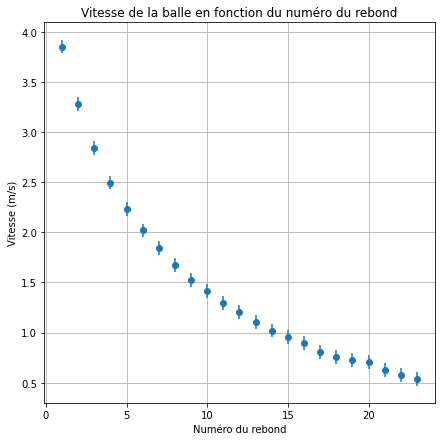

In [11]:
# On trace la vitesse de la balle en fonction du numéro du rebond

plt.figure(figsize = (7, 7))
plt.errorbar(data['rebond'], data['vitesse'], yerr=data['vitesse_err'], fmt='o')
plt.title('Vitesse de la balle en fonction du numéro du rebond')
plt.xlabel('Numéro du rebond')
plt.ylabel('Vitesse (m/s)')
plt.grid()
plt.show()

Maintenant on s'intéresse pour déterminer le coefficient de restitution $K$ en fonction du numéro de rebond de la balle de ping-pong. On sait que l'énergie cinétique vaut $E_c = \frac{1}{2} m \vec{v}^2$. On peut donc écrire le coefficient de restitution comme:

$$ K_i = \frac{E_{\text{cinétique après rebond}}}{E_{\text{cinétique avant rebond}}} = \frac{\frac{1}{2} m \ \vec{v_i}^2}{\frac{1}{2} m \ \vec{v_{i -1}}^2} = \frac{\vec{v_i}^2}{\vec{v_{i -1}}^2} = \frac{T_i^2}{T_{i -1}^2} = \frac{\left( t_{i+1} - t_i \right) ^ 2}{\left( t_i - t_{i-1} \right) ^ 2} $$

Pour calculer l'incertitude $\Delta K_i$ sur la quantité $K$ qui dépend de $n$ variables $x_j$, on peut utiliser l'approximation suivante :

$$ \Delta K_i^2 = \sum _{j=1}^n \left(\frac{\partial K_i}{\partial x_j}\right)^2 \Delta x_j^2 + 2 \sum_{i, j<i} cov(x_i, x_j) \left \vert \frac{\partial K}{\partial x_i} \frac{\partial K}{\partial x_j} \right \vert $$

Où on considére à la fois les incertitudes sur les mesures et ses corrélations éventuelles. On préfèrera les calculer la propagation des erreurs en fonction du temps au lieu de la vitesse, parce que comme on a vu avant, les mesures de vitesses sont corrélées entre elles, tandis que les mesures de temps ne le sont pas. Ce qui simplifie le calcul de l'incertitude avec:

$$ cov(x_i, x_j) \left \vert \frac{\partial K}{\partial x_i} \frac{\partial K}{\partial x_j} \right \vert = 0 $$

Et on obtient:

$$ \Delta K_i^2 = \sum _{j=1}^n \left(\frac{\partial K_i}{\partial x_j}\right)^2 \Delta x_j^2 $$

Où on peut vérifier que l'incertitude sur la quantité $K$ dépend simplement des incertitudes sur les mesures de départ et des dérivées partielles de la fonction $K$ par rapport à chaque variable $x_i$.

Dans notre cas, en posant $x_1 = t_i$ et $x_2 = t_{i-1}$, on obtient:

$$ \Delta K_i^2 = \left( \frac{\partial K_i}{\partial t_i} \right)^2 \Delta t_i^2 + \left( \frac{\partial K_i}{\partial t_{i+1}} \right)^2 \Delta t_{i+1}^2 + \left( \frac{\partial K_i}{\partial t_{i-1}} \right)^2 \Delta t_{i-1}^2  $$

$$ \Delta K_i^2 = \left( \frac{\partial \left( \frac{t_{i+1} - t_i}{ t_i - t_{i-1}} \right)^2 }{\partial t_i} \right)^2 \Delta t_i^2 + \left( \frac{\partial \left( \frac{t_{i+1} - t_i}{t_i - t_{i-1}} \right)^2 }{\partial t_{i+1}} \right)^2 \Delta t_{i+1}^2 + \left( \frac{\partial \left( \frac{t_{i+1} - t_i}{t_i - t_{i-1}} \right)^2 }{\partial t_{i-1}} \right)^2 \Delta t_{i-1}^2  $$

On pourra simplifier cette expression en utilisant la règle de la chaîne pour les dérivées partielles, pour arriver à:

$$ \Delta K_i = 2 \ K_i \sqrt{ \left( 2 \frac{\Delta t}{t_i - t_{i-1}} \right)^2 + \left( 2 \frac{\Delta t}{t_{i+1} - t_i} \right)^2 } $$

In [35]:
# on calcule K 
data['K'] = (data['diff'] ** 2) / (data['diff'].shift(1) ** 2)

In [36]:
# On calcule l'erreur sur le coefficient de restitution
data['err_K'] = 2 * data['K'] * np.sqrt((2 * delta_t / data['diff']) ** 2 + (2 * delta_t / data['diff'].shift(1)) ** 2)

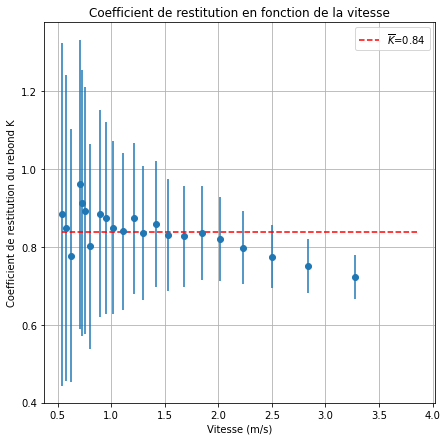

In [38]:
plt.figure(figsize = (7, 7))
plt.errorbar(data['vitesse'], data['K'], yerr=data['err_K'], fmt='o')
plt.plot(data['vitesse'], [data['K'].mean()] * len(data['vitesse']), 'r--', label=r'$\overline{K}$=' + str(round(data['K'].mean(), 2)))
plt.title('Coefficient de restitution en fonction de la vitesse')
plt.xlabel('Vitesse (m/s)')
plt.ylabel('Coefficient de restitution du rebond K')
plt.legend()
plt.grid()
plt.show()

D'après cette représentation graphique, on obtient une valeur moyenne du coefficient de restitution $\overline{K}=0.84$, ce qui confirme la valeur attendue de ($\overline{K} < 1$). Pour bien comprendre cette partie, on analyse l'énergie total du système décrite par l'équation:

$$ E_c + E_p = E_c' + E_p' + E_d $$

Où $E_p$ représente l'énergie potentielle de la balle avant le rebond, $E_p'$ celle après le rebond, et $E_d$ est l'énergie dissipée par la balle pendant le rebond et $E_c$ l'énergie cinétique. On peut donc remarquer que l'énergie cinetique perd en moyenne $16 \%$ de son énergie à chaque rebond.

### Comparaison avec les résultats de QExPy

Maintent, à l'aide du module [QuexPy](https://qexpy.readthedocs.io/en/latest/intro.html) on peut calculer l'incertitude sur les valeurs de $\vec{v}$.

In [16]:
# On fait la conversion en array pour qexpy 
vitesse = data['vitesse'].to_numpy()
vitesse_err = data['vitesse_err'].to_numpy()
# On crée un array de mesure de vitesse
vitesse_mes=qexpy.MeasurementArray(vitesse, error=vitesse_err, unit="m/s", name="vitesse")
# On affiche les mesures
print("Vitesses = ", vitesse_mes)

Vitesses =  vitesse = [ 3.85 +/- 0.07, 3.28 +/- 0.07, 2.84 +/- 0.07, 2.50 +/- 0.07, 2.23 +/- 0.07, 2.02 +/- 0.07, 1.84 +/- 0.07, 1.68 +/- 0.07, 1.53 +/- 0.07, 1.42 +/- 0.07, 1.29 +/- 0.07, 1.21 +/- 0.07, 1.11 +/- 0.07, 1.02 +/- 0.07, 0.95 +/- 0.07, 0.90 +/- 0.07, 0.80 +/- 0.07, 0.76 +/- 0.07, 0.72 +/- 0.07, 0.71 +/- 0.07, 0.63 +/- 0.07, 0.58 +/- 0.07, 0.54 +/- 0.07 ] (m⋅s^-1)


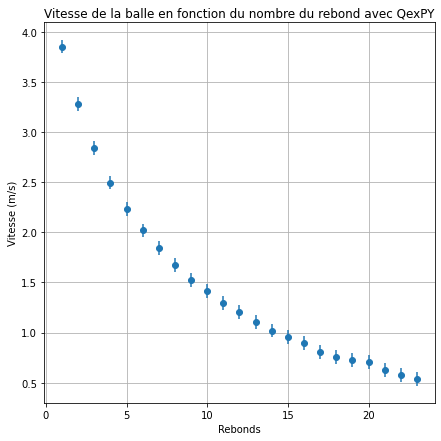

In [17]:
plt.figure(figsize = (7, 7))
plt.errorbar(data['rebond'], vitesse_mes.values, yerr=vitesse_mes.errors, fmt='o')
plt.title('Vitesse de la balle en fonction du nombre du rebond avec QexPY')
plt.xlabel('Rebonds')
plt.ylabel('Vitesse (m/s)')
plt.grid()
plt.show()

In [18]:

def vitesse_error_compare(data, vitesse_mes):
    """
    Cette fonction compare l'erreur sur la vitesse avec QexPY et l'erreur sur la vitesse calculée à la main
    """
    for i in range(1, len(data)):
        if vitesse_mes.errors[i] == data['vitesse_err'][i+1]:
            return True
    return False

print("L'erreur sur la vitesse est égale à l'erreur sur la vitesse avec QexPY: ", vitesse_error_compare(data, vitesse_mes))

L'erreur sur la vitesse est égale à l'erreur sur la vitesse avec QexPY:  True


On remarque que l'incertitude trouvé à l'aide de `QuexPy` et celle trouvé à l'aide de la formule de propagation des erreurs sont les mêmes.

### Extraction d’une erreur statistique sur les coefficients de restitution

Nombre de fichiers lus:  2


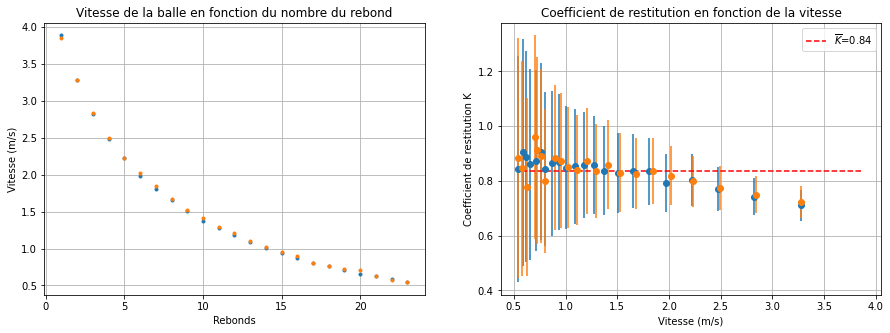

In [25]:
# on crée une liste vide pour stocker les données
data_list = []

# on crée une liste de tous les fichiers à lire
#dataset_list = ['./Acoustic Stopwatch_2023-03-07_15-26-31/All.csv', './Acoustic Stopwatch_2023-03-07_15-27-22/All.csv', './Acoustic Stopwatch_2023-03-07_15-24-18/All.csv']

dataset_list = ['./Acoustic Stopwatch_2023-03-07_15-26-31/All.csv', './Acoustic Stopwatch_2023-03-07_15-24-18/All.csv']

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

means_K = list()

# on lit tous les fichiers
for dataset in dataset_list:
    data = pd.read_csv(dataset, sep=',')
    data['diff'] = data['Event time (s)'].diff()
    # on supprime la première ligne qui est NaN
    data = data.dropna()
    data = data.iloc[:23]
    
    # On calcule le nombre du rebond
    data['rebond'] = np.arange(1, len(data)+1)
    # on calcule la vitesse
    data['vitesse'] = g * data['diff'] / 2

    ax1.plot(data['rebond'], data['vitesse'], '.', label=dataset)
    
    # on calcule le coefficient de restitution K
    data['K'] = (data['diff'] ** 2) / (data['diff'].shift(1) ** 2)
    # on calcule l'erreur sur le coefficient de restitution \Delta K
    data['err_K'] = 2 * data['K'] * np.sqrt((2 * delta_t / data['diff']) ** 2 + (2 * delta_t / data['diff'].shift(1)) ** 2)
    means_K.append(data['K'].mean())
    # On trace ax.plot( data['vitesse'], data['k'], 'o')
    ax2.errorbar(data['vitesse'], data['K'], yerr=data['err_K'], fmt='o')
    
    # on ajoute les données à la liste
    data_list.append(data)
    

ax1.set_title('Vitesse de la balle en fonction du nombre du rebond')
ax1.set_xlabel('Rebonds')
ax1.set_ylabel('Vitesse (m/s)')
ax1.grid()


ax2.plot(data['vitesse'], [np.mean(means_K)] * len(data['vitesse']), 'r--', label=r'$\overline{K}$=' + str(round(data['K'].mean(), 2)))
ax2.set_title('Coefficient de restitution en fonction de la vitesse')
ax2.set_xlabel('Vitesse (m/s)')
ax2.set_ylabel('Coefficient de restitution K')
ax2.grid()
ax2.legend()

# length of the list
data_list_len = len(data_list)
print("Nombre de fichiers lus: ", data_list_len)

plt.show()

In [35]:
k_list = list()
k_err_list = list()
for i in range(1, len(data_list)):
    data_list[i] = data_list[i].dropna()
    k = data_list[i]['K']
    k_err = data_list[i]['err_K']
    k_list.append(k.to_numpy())
    k_err_list.append(k_err.to_numpy())

## flat list
k_list = [item for sublist in k_list for item in sublist]
k_err_list = [item for sublist in k_err_list for item in sublist]

# Calcul de la moyenne et de l'écart type des valeurs de K
K_values = qexpy.MeasurementArray(k_list, error=k_err_list, unit="", name="K")
K_mean = qexpy.mean(K_values)
K_std = np.std(K_values, ddof=1)

# Calcul de l'incertitude sur la moyenne des valeurs de K
delta_K_mean = K_std / qexpy.sqrt(len(K_values))

# Affichage des résultats
print("Moyenne des valeurs de K = '{}'".format(K_mean))
print("Incertitude sur la moyenne des valeurs de K = {:.3f}".format(delta_K_mean))
print("Incertitude combinée sur toutes les mesures de K = {:.3f}".format(K_std))

Moyenne des valeurs de K = 'mean of K = 0.88 +/- 0.03'
Incertitude sur la moyenne des valeurs de K = 0.031
Incertitude combinée sur toutes les mesures de K = 0.205


On voit que à partir de toutes les mesures, on obtient une distribution de valeurs pour le coefficient de restitution $K$ avec une valeur moyenne de `-0.03`et une incertitude de `0.042`. Aussi on a calculé l'incertitude combinée sur l'écart-type de la distribution de valeurs de $K \pm 0.299 $.

Pour faire l'analyse de mesures on a utilisé le module [MonteCarloSettings](https://qexpy.readthedocs.io/en/latest/_modules/qexpy/data/utils.html#MonteCarloSettings) de `QuexPy`. Ce module permet de faire l'analyse de mesures en utilisant la méthode de Monte Carlo (qui qui permet de propager l'incertitude associée à des mesures individuelles à des fonctions mathématiques complexes). On peut utiliser ce module pour calculer l'incertitude sur les coefficients de restitution $K$. 

### Conclusion

Un exemple simple comme la chute d'une balle de ping-pong montre que l'incertitude sur les mesures de temps peut avoir un impact important sur l'incertitude sur le coefficient de restitution. On a calculé l'incertitude sur la vitesse de la balle à l'aide de la formule de propagation des erreurs et à l'aide du module [QuexPy](https://qexpy.readthedocs.io/en/latest/intro.html). On a remarqué que les deux méthodes donnent les mêmes résultats. 

L'analyse des énergies cinetiques avant et après le rebond montre qu'on peut obtenir le rapport de restitution $K$ qui va nous permettre d'obtenir la fiabilité du modèle. La bibliothéque QuexPy permet aussi faire l'analyse des erreurs statistiques à l'aide de la méthode de Monte Carlo, cependant, il manqué des mesures pour obtenir un résultat fiable.